# Introduction to Linear Regression

We will be using [statsmodels](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html) for learning about linear regression. It covers the models better than in scikit when we are learning and want more insights into the model parameters. But we will mainly be using scikit learn for the rest of the course. 

In [1]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", )

In [3]:
# Summarise the data
house_data.describe()

,Unnamed: 0,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,219.000000,219.000000,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,109.000000,483431.050228,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,486219.119635
std,63.364028,400124.919077,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,397858.185948
min,0.000000,24500.000000,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,28836.500000
25%,54.500000,319000.000000,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,307448.750000
50%,109.000000,390000.000000,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,391980.000000
75%,163.500000,512500.000000,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,532475.000000
max,218.000000,3686000.000000,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3973508.000000


In [4]:
# Remove the first column that's an index
house_data = house_data.drop('Unnamed: 0', 1)

In [5]:
# Look for any linear correlations in the data
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018EFC748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000208DFE48>]], dtype=object)

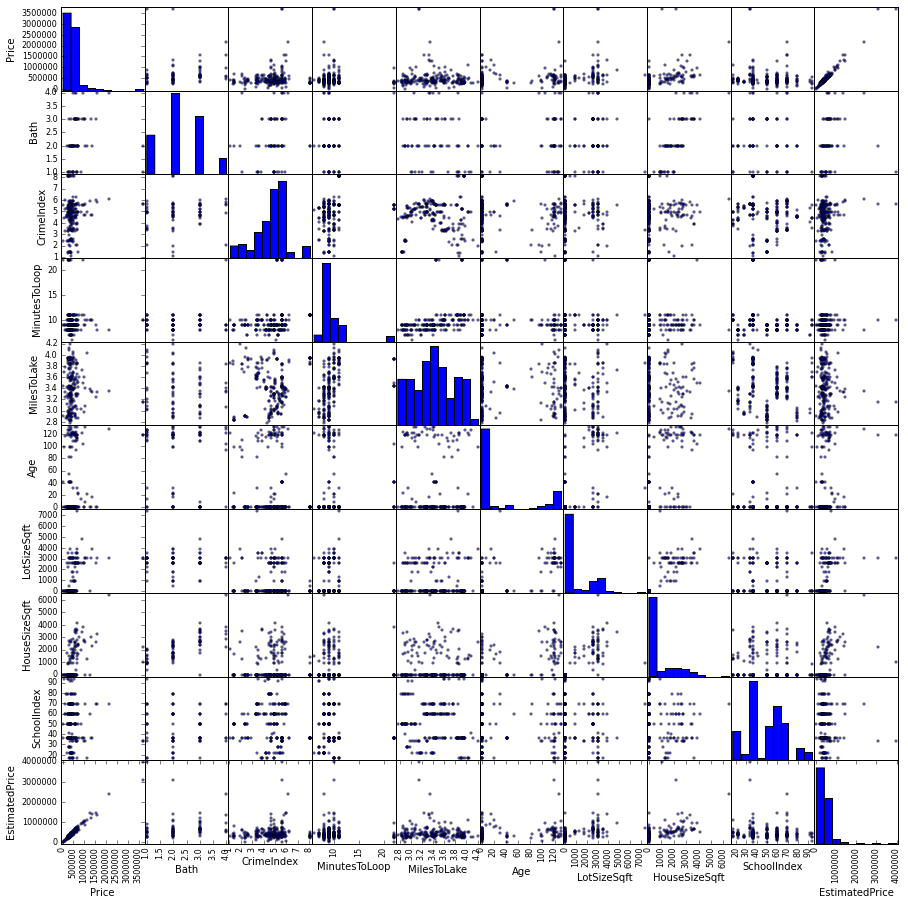

In [6]:
# Plot the data
pd.scatter_matrix(house_data, figsize=(15,15))

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [57]:
# create a fitted model in one line
lm = smf.ols(formula='Price ~ HouseSizeSqft +Age + SchoolIndex + CrimeIndex +LotSizeSqft +MilesToLake', data=house_data).fit()

# print the coefficients
lm.params

Intercept        675853.747863
HouseSizeSqft        95.463758
Age               -1601.541756
SchoolIndex       -1332.217484
CrimeIndex        27659.996458
LotSizeSqft         100.554958
MilesToLake     -106238.203500
dtype: float64

In [58]:
# What would you expect a house price to be for a house with 3 bathrooms and 350 sqft?
# Calculate it.
y =(508310-28995*3) + (350*133.011874)
y =(383019-789*10)+(350*176)

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     12.37
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           6.28e-12
Time:                        20:34:40   Log-Likelihood:                -3102.4
No. Observations:                 219   AIC:                             6219.
Df Residuals:                     212   BIC:                             6242.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      6.759e+05   2.67e+05      2.536      0.012       1.5e+05   1.2e+06
HouseSizeSqft    95.4638     36.865      2.590      0.010        22.795   168.133
Age           -1601.5418    698.546     -2.293      0.023     -2978.528  -224.555
SchoolIndex   -1332.2175   1309.904     -1.017      0.310     -3914.322  1249.887
CrimeIndex     2.766e+04   1.71e+04      1.622      0.106     -5952.080  6.13e+04
LotSizeSqft     100.5550     33.886      2.967      0.003        33.759   167.351
MilesToLake   -1.062e+05   6.93e+04     -1.534      0.127     -2.43e+05  3.03e+04
==============================================================================
Omnibus:                      297.369   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22744.692
Skew:                           6.028   Prob(JB):                         0.00
Kurtosis:                      51.448   Cond. No.                     2.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Let's try just the estimated price
# create a fitted model in one line
lm = smf.ols(formula='Price ~ EstimatedPrice ', data=house_data).fit()

# print the coefficients
lm.params

y =(2371+.98) + 0

Intercept         2371.037940
EstimatedPrice       0.989389
dtype: float64

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     6529.
Date:                Wed, 16 Dec 2015   Prob (F-statistic):          6.25e-164
Time:                        20:07:20   Log-Likelihood:                -2758.9
No. Observations:                 219   AIC:                             5522.
Df Residuals:                     217   BIC:                             5529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       2371.0379   7685.764      0.308      0.758     -1.28e+04  1.75e+04
EstimatedPrice     0.9894      0.012     80.801      0.000         0.965     1.014
==============================================================================
Omnibus:                      198.218   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8006.566
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      31.941   Cond. No.                     9.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# create a DataFrame with the minimum and maximum values of EstimatedPrice
X_new = pd.DataFrame({'EstimatedPrice': [house_data.EstimatedPrice.min(), house_data.EstimatedPrice.max()]})
X_new.head()

,EstimatedPrice
0,28836.5
1,3973508.0


In [12]:
preds = lm.predict(X_new)
preds

array([   30901.56354902,  3933717.4826128 ])

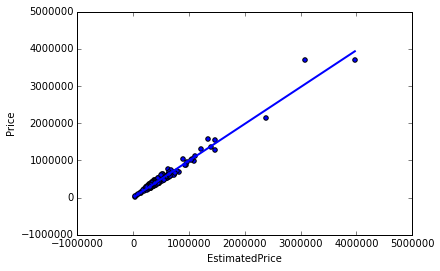

In [14]:
# first, plot the observed data
house_data.plot(kind='scatter', x='EstimatedPrice', y='Price')

# then, plot the least squares line
plt.plot(X_new, preds, c='blue', linewidth=2)

In [ ]:
# Try selecting different variables or combinations of variables. Can you get a better fit?